In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# 1. LOAD DATA

In [3]:
DATA_PATH = "earthquake_1995-2023.csv"

df = pd.read_csv(DATA_PATH, low_memory=False)
alert_mapping = {
    'none': 0,
    'green': 1,
    'yellow': 2,
    'orange': 3,
    'red': 4
}

df['alert_encoded'] = df['alert'].fillna('none').map(alert_mapping)

print("Dataset loaded. Shape:", df.shape)
print(df.head())

Dataset loaded. Shape: (1000, 20)
                                      title  magnitude         date_time  cdi  \
0          M 6.5 - 42 km W of Sola, Vanuatu        6.5  16-08-2023 12:47    7   
1  M 6.5 - 43 km S of Intipucá, El Salvador        6.5  19-07-2023 00:22    8   
2  M 6.6 - 25 km ESE of Loncopué, Argentina        6.6  17-07-2023 03:05    7   
3     M 7.2 - 98 km S of Sand Point, Alaska        7.2  16-07-2023 06:48    6   
4                  M 7.3 - Alaska Peninsula        7.3  16-07-2023 06:48    0   

   mmi   alert  tsunami  sig net  nst      dmin    gap magType    depth  \
0    4   green        0  657  us  114  7.177000   25.0     mww  192.955   
1    6  yellow        0  775  us   92  0.679000   40.0     mww   69.727   
2    5   green        0  899  us   70  1.634000   28.0     mww  171.371   
3    6   green        1  860  us  173  0.907000   36.0     mww   32.571   
4    5     NaN        1  820  at   79  0.879451  172.8      Mi   21.000   

   latitude  longitude      

# 2. FEATURE ANALYSIS

In [25]:
print("\n=== Feature Types ===")
print(df.dtypes)

print("\n=== Missing Values per Column ===")
print(df.isna().sum())


=== Feature Types ===
title             object
magnitude        float64
date_time         object
cdi                int64
mmi                int64
alert             object
tsunami            int64
sig                int64
net               object
nst                int64
dmin             float64
gap              float64
magType           object
depth            float64
latitude         float64
longitude        float64
location          object
continent         object
country           object
alert_encoded      int64
dtype: object

=== Missing Values per Column ===
title              0
magnitude          0
date_time          0
cdi                0
mmi                0
alert            551
tsunami            0
sig                0
net                0
nst                0
dmin               0
gap                0
magType            0
depth              0
latitude           0
longitude          0
location           6
continent        716
country          349
alert_encoded      0
dtype: i

# 3. DATA STATISTICS

In [24]:
print("\n=== Numerical Feature Statistics ===")
print(df.describe())


=== Numerical Feature Statistics ===
         magnitude          cdi         mmi      tsunami          sig  \
count  1000.000000  1000.000000  1000.00000  1000.000000  1000.000000   
mean      6.940150     3.605000     6.02700     0.325000   847.915000   
std       0.438148     3.328972     1.43399     0.468609   301.802632   
min       6.500000     0.000000     1.00000     0.000000   650.000000   
25%       6.600000     0.000000     5.00000     0.000000   691.000000   
50%       6.800000     4.000000     6.00000     0.000000   744.000000   
75%       7.100000     7.000000     7.00000     1.000000   874.250000   
max       9.100000     9.000000    10.00000     1.000000  2910.000000   

               nst         dmin          gap        depth     latitude  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    193.918000     1.125174    20.926290    74.612541     4.315554   
std     239.045858     2.073164    24.415895   130.812590    26.633320   
min     

# 4. CORRELATION MATRIX (Pearson)

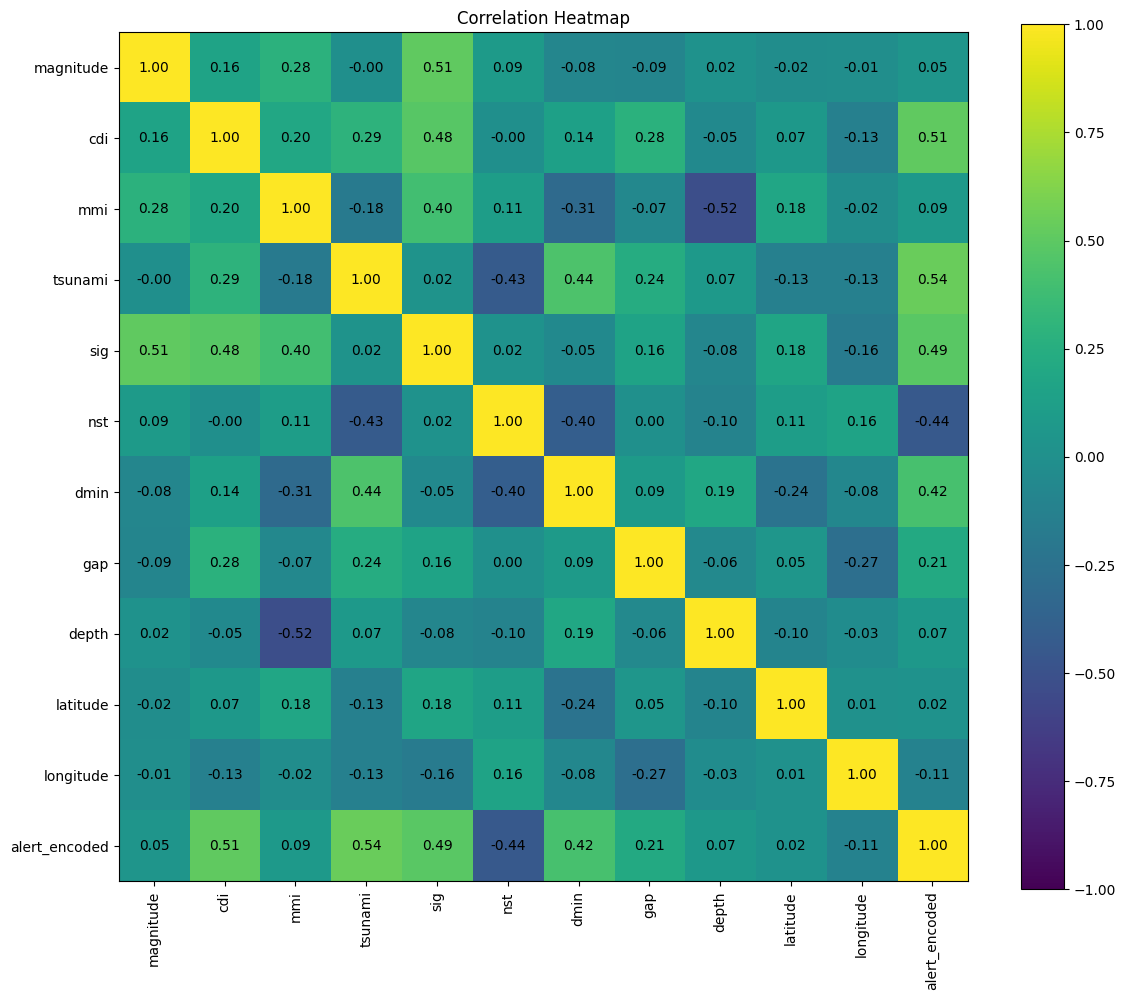

In [26]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(method = "pearson")

plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap="viridis", vmin=-1, vmax=1)
plt.colorbar()
plt.title("Correlation Heatmap")

plt.xticks(range(len(num_df.columns)), num_df.columns, rotation=90)
plt.yticks(range(len(num_df.columns)), num_df.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        plt.text(
            j, i,
            f"{value:.2f}",
            ha="center", va="center",
            color= "black"
        )

plt.tight_layout()
plt.show()


# 4. Correlation Matrix (Spearman)

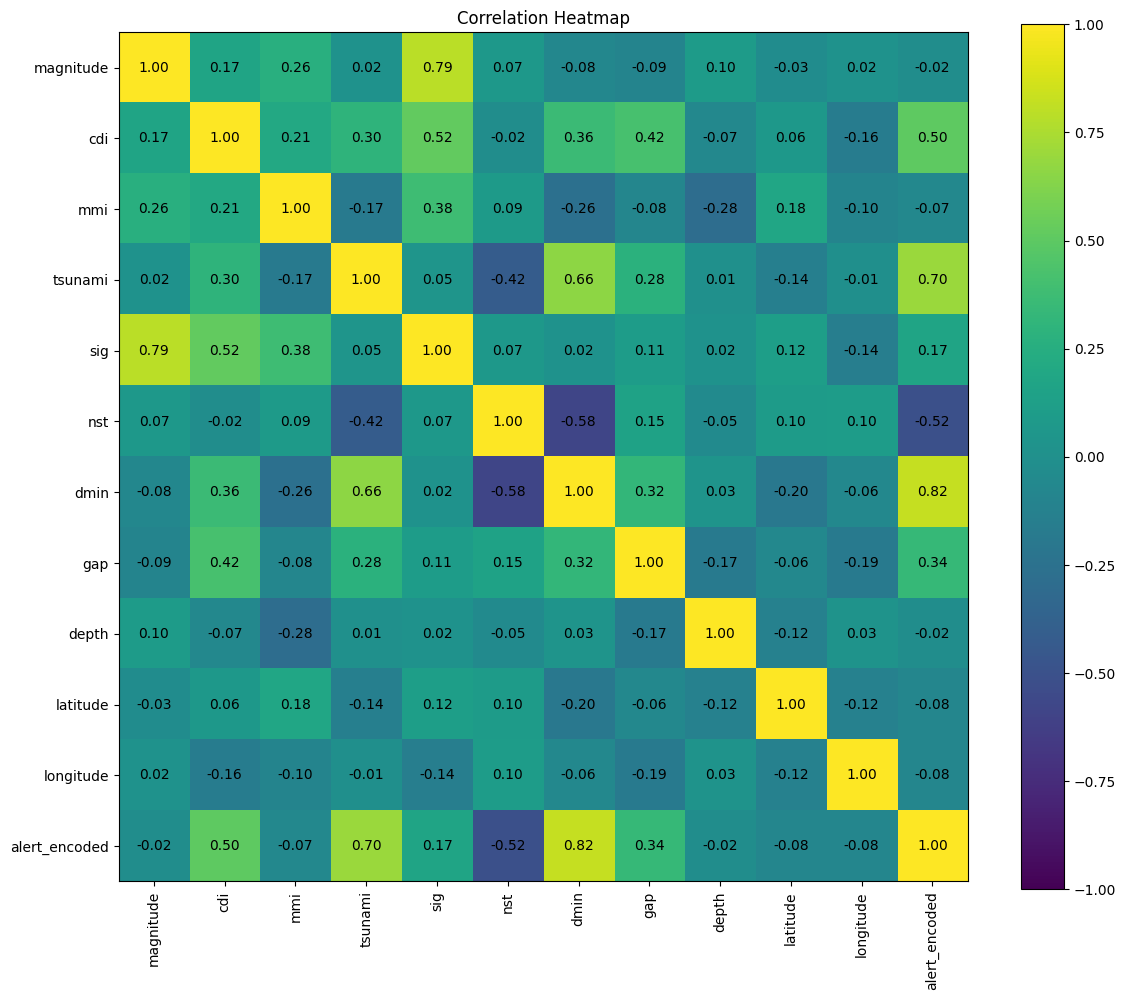

In [27]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(method = "spearman")

plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap="viridis", vmin=-1, vmax=1)
plt.colorbar()
plt.title("Correlation Heatmap")

plt.xticks(range(len(num_df.columns)), num_df.columns, rotation=90)
plt.yticks(range(len(num_df.columns)), num_df.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        plt.text(
            j, i,
            f"{value:.2f}",
            ha="center", va="center",
            color= "black"
        )

plt.tight_layout()
plt.show()

# 4. Correlation Matrix (Kendall)

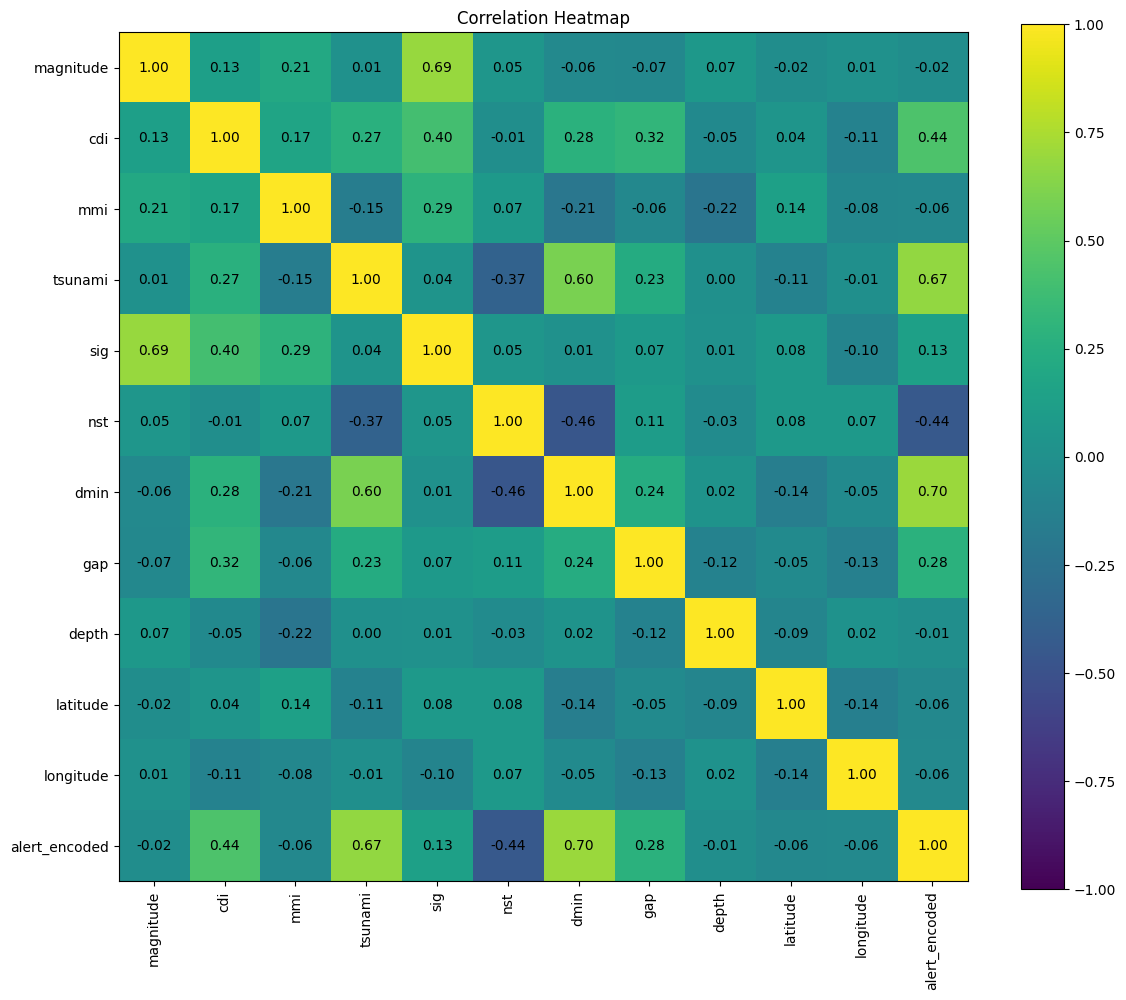

In [29]:
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr(method = "kendall")

plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap="viridis", vmin=-1, vmax=1)
plt.colorbar()
plt.title("Correlation Heatmap")

plt.xticks(range(len(num_df.columns)), num_df.columns, rotation=90)
plt.yticks(range(len(num_df.columns)), num_df.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        plt.text(
            j, i,
            f"{value:.2f}",
            ha="center", va="center",
            color= "black"
        )

plt.tight_layout()
plt.show()

# 5. HISTOGRAMS OF NUMERICAL FEATURES

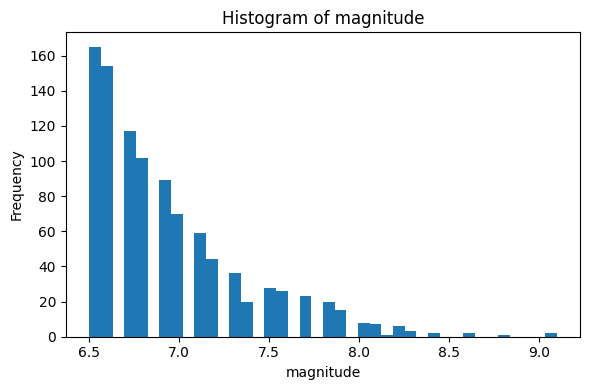

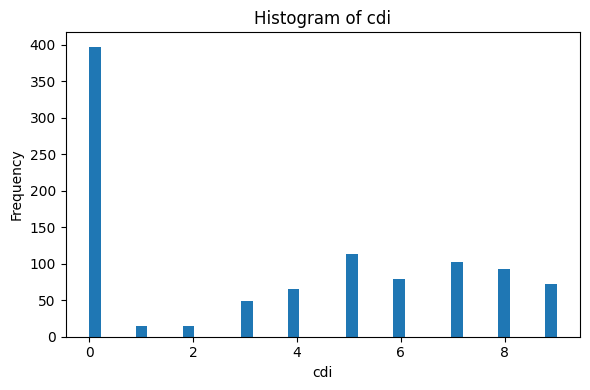

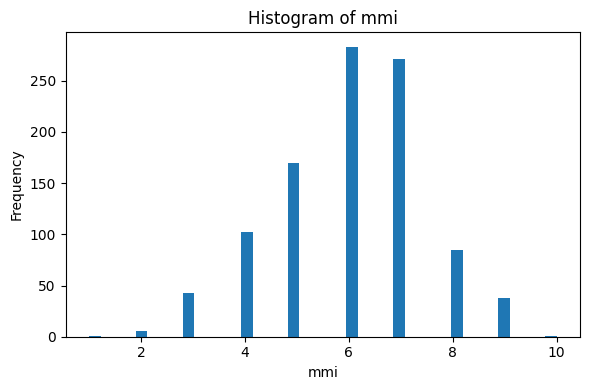

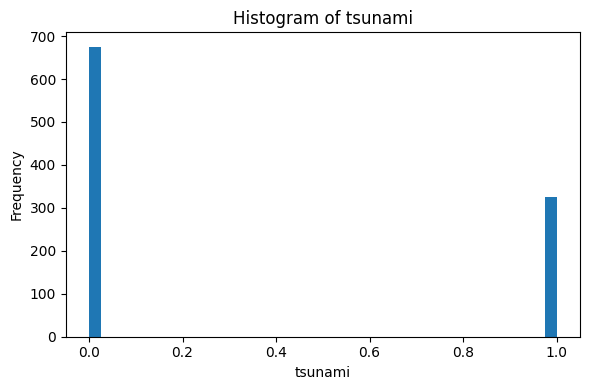

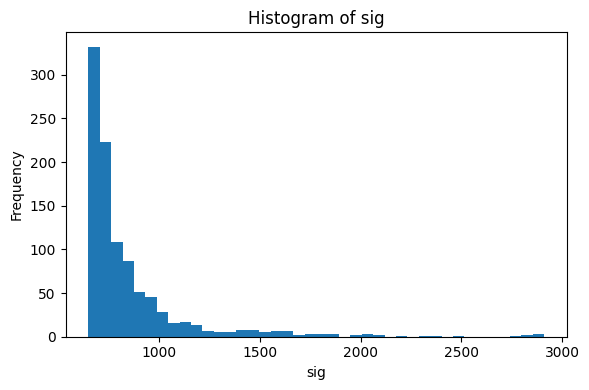

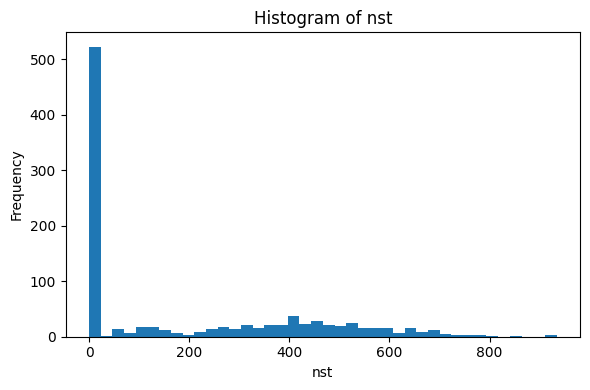

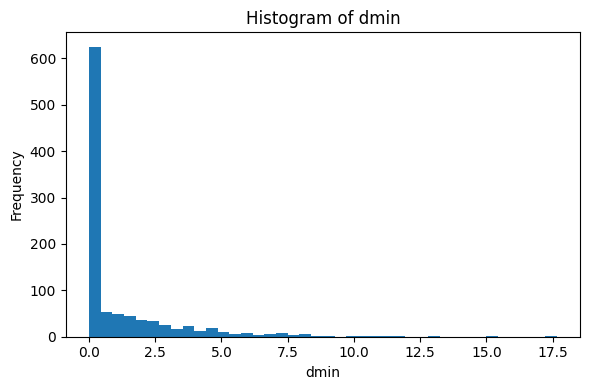

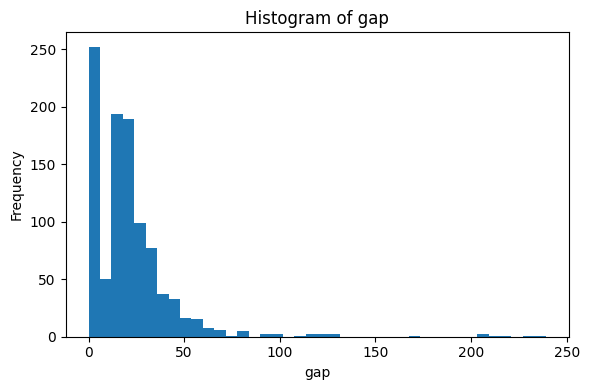

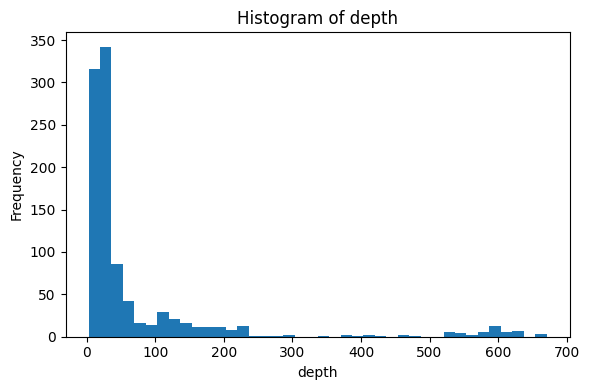

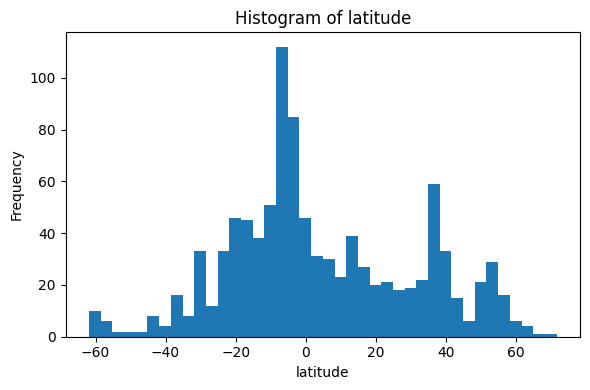

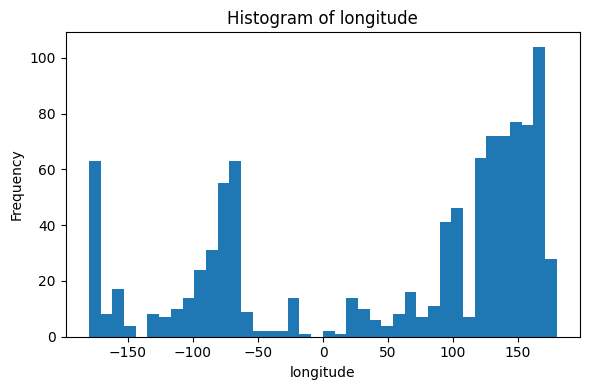

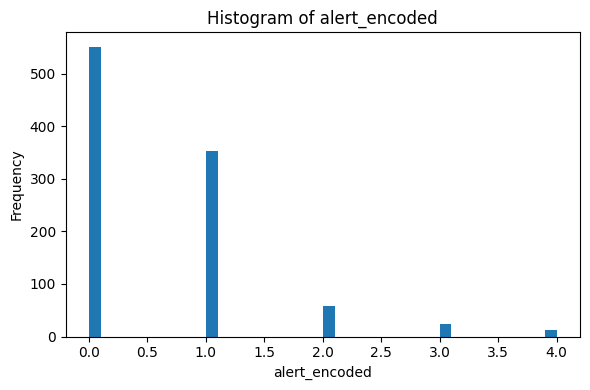

In [30]:
for column in num_df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column].dropna(), bins=40)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# 6. BOXPLOTS FOR OUTLIER ANALYSIS

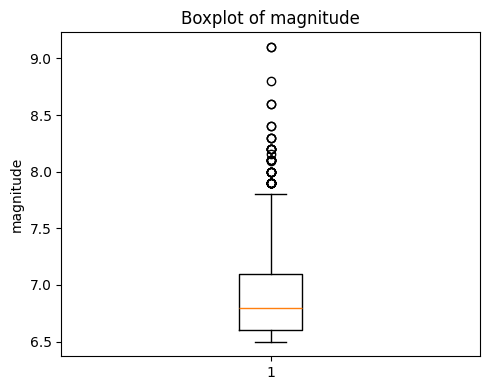

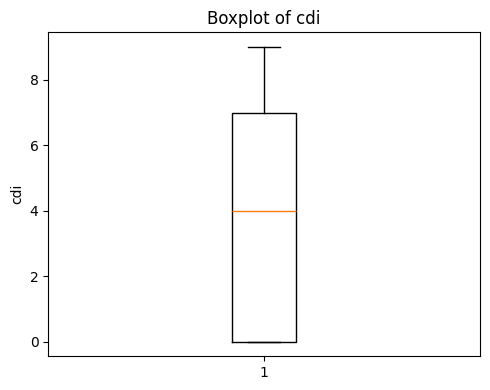

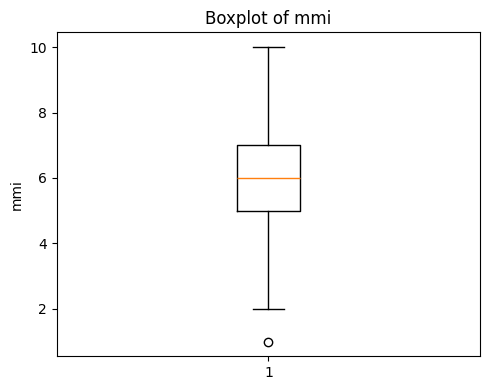

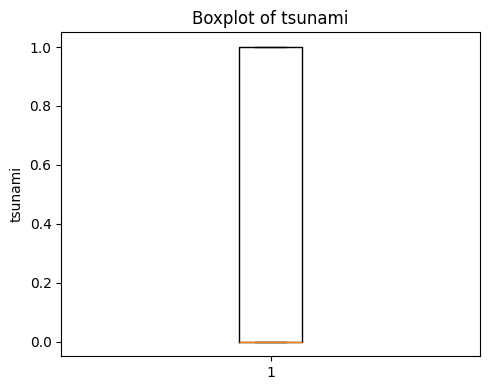

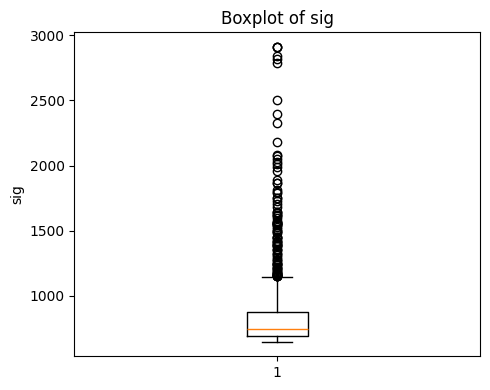

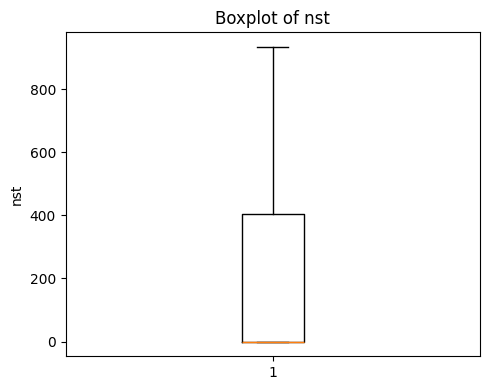

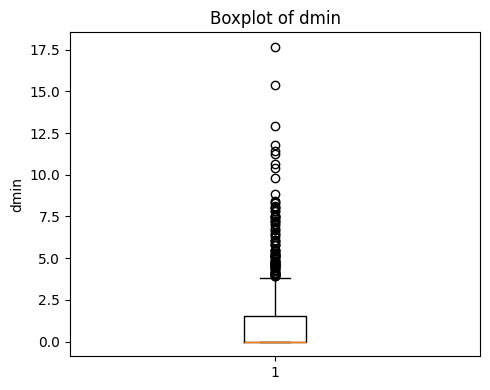

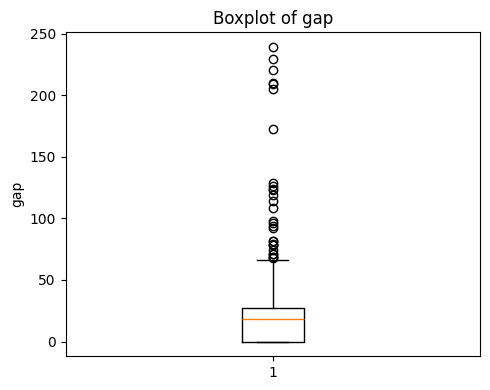

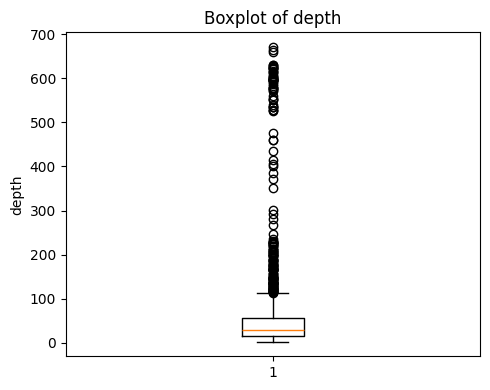

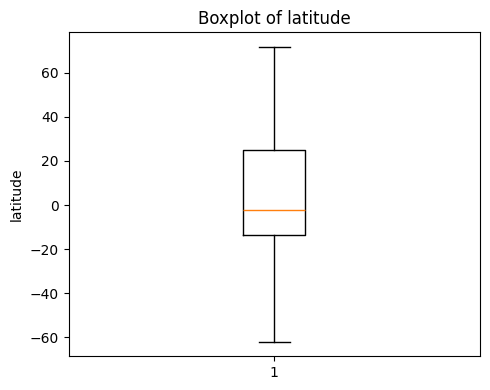

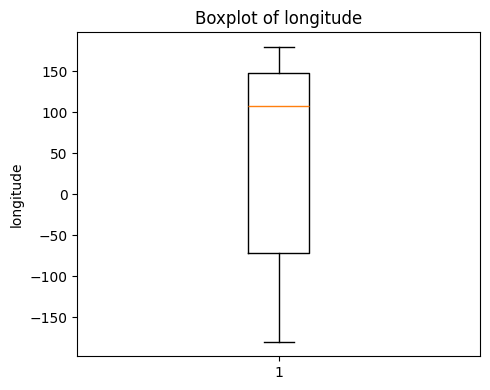

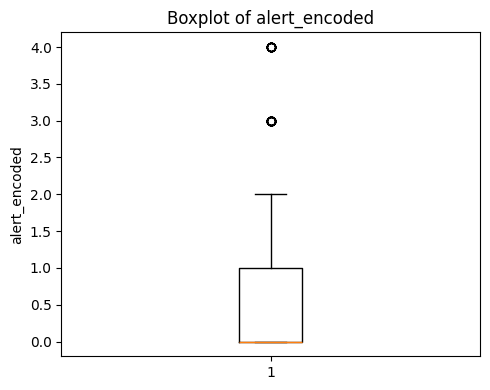

In [31]:
for column in num_df.columns:
    plt.figure(figsize=(5, 4))
    plt.boxplot(df[column].dropna())
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

# 7. FEATURE IMPORTANCE (Tsunami Classification)

In [32]:
if 'tsunami' in df.columns:
    print("\n=== Feature Importance for Tsunami Prediction (Mutual Information) ===")

    y_class = df['tsunami']
    X_class = df.drop(columns=['tsunami'])

    for col in X_class.select_dtypes(include=['object']).columns:
        X_class[col] = LabelEncoder().fit_transform(X_class[col].astype(str))

    mi_scores = mutual_info_classif(X_class.fillna(0), y_class)

    for feat, score in zip(X_class.columns, mi_scores):
        print(f"{feat}: {score}")


=== Feature Importance for Tsunami Prediction (Mutual Information) ===
title: 0.05475205041511111
magnitude: 0.0
date_time: 0.022941862974650062
cdi: 0.07778647678356809
mmi: 0.0
alert: 0.34228724169889135
sig: 0.024451891824518457
net: 0.018651075741138667
nst: 0.1308604417145134
dmin: 0.28534245560616256
gap: 0.17536828390718884
magType: 0.2510536603758917
depth: 0.009978698923725826
latitude: 0.04958302244522095
longitude: 0.16840637599936503
location: 0.08381009195489231
continent: 0.0044798049469894075
country: 0.07710934173084705
alert_encoded: 0.3363492024189243


# 8. FEATURE IMPORTANCE (Significance Regression)

In [33]:
if 'sig' in df.columns:
    print("\n=== Feature Importance for Significance Regression (Mutual Information) ===")

    y_reg = df['sig']
    X_reg = df.drop(columns=['sig'])

    for col in X_reg.select_dtypes(include=['object']).columns:
        X_reg[col] = LabelEncoder().fit_transform(X_reg[col].astype(str))

    mi_reg = mutual_info_regression(X_reg.fillna(0), y_reg)

    for feat, score in zip(X_reg.columns, mi_reg):
        print(f"{feat}: {score}")


=== Feature Importance for Significance Regression (Mutual Information) ===
title: 1.4016593623718623
magnitude: 1.4486020461082836
date_time: 0.0
cdi: 0.5915652436549292
mmi: 0.16324351672458537
alert: 0.23434560932801807
tsunami: 0.03266368842937184
net: 0.05206992274458999
nst: 0.05583877695341499
dmin: 0.06765805845956896
gap: 0.1907055480316573
magType: 0.1169495447624409
depth: 0.05254177927434833
latitude: 0.0897155597174688
longitude: 0.071566413562552
location: 0.03297863818393498
continent: 0.0453925978125036
country: 0.008268482019187395
alert_encoded: 0.23053427767033563


# 10. DEPTH VS MAGNITUDE (Colored by Tsunami)

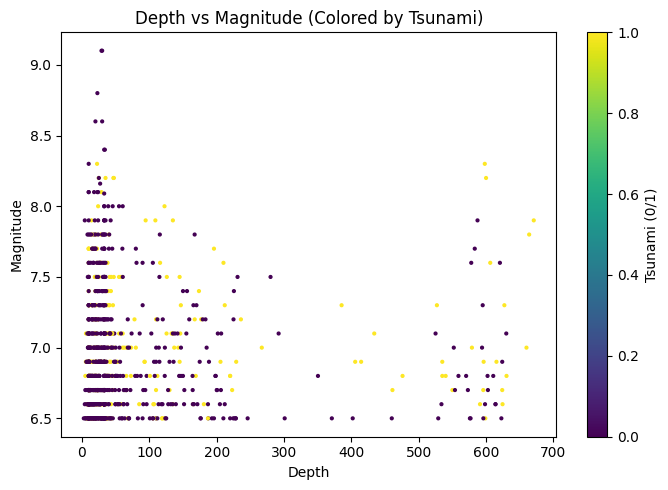

In [34]:
if 'depth' in df.columns and 'magnitude' in df.columns and 'tsunami' in df.columns:
    plt.figure(figsize=(7, 5))
    scatter = plt.scatter(df['depth'], df['magnitude'], c=df['tsunami'], s=4)
    plt.colorbar(scatter, label="Tsunami (0/1)")
    plt.title("Depth vs Magnitude (Colored by Tsunami)")
    plt.xlabel("Depth")
    plt.ylabel("Magnitude")
    plt.tight_layout()
    plt.show()

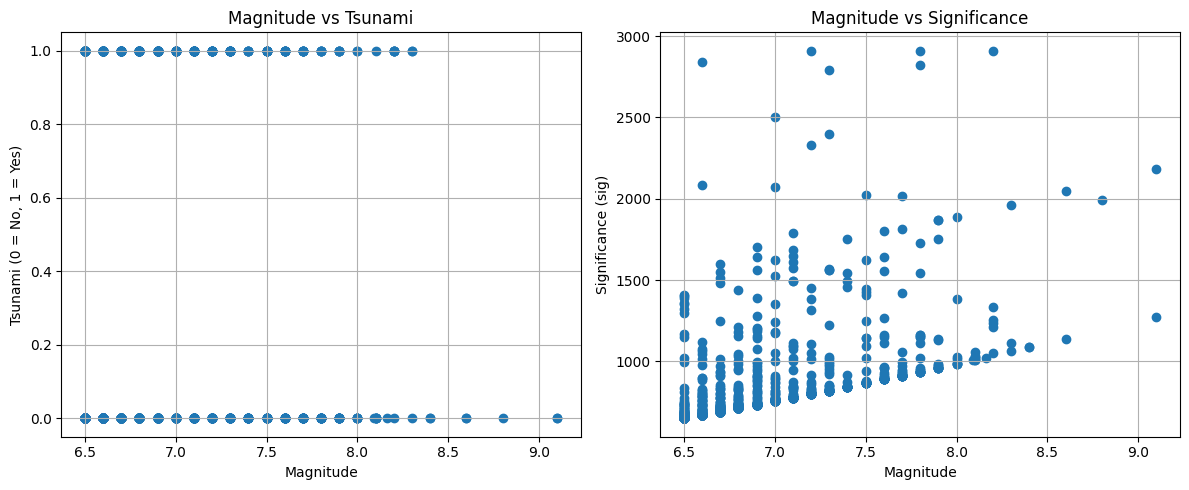

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['magnitude'], df['tsunami'])
plt.title("Magnitude vs Tsunami")
plt.xlabel("Magnitude")
plt.ylabel("Tsunami (0 = No, 1 = Yes)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df['magnitude'], df['sig'])
plt.title("Magnitude vs Significance")
plt.xlabel("Magnitude")
plt.ylabel("Significance (sig)")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
print("\nAnalysis complete.")